In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy import stats


In [3]:
data = pd.read_csv('Datasets/processed_dataset.csv')
data

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,qinclong,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,0.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,0.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,0.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,0.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,NaN,0,2080,17000.0,8.173077,43.977001,1,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,2,1260,28,2,...,NaN,0,2340,17000.0,7.264957,43.977001,0,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,4,301,27,2,...,0.0,0,360,3200.0,8.888889,79.933998,0,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,2,201,36,2,...,NaN,0,2080,13000.0,6.250000,43.977001,1,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,2,201,49,2,...,0.0,0,250,8800.0,35.200001,94.727997,1,14,9,3


In [5]:
nan_count = data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 9



Columns with NaN values and their counts
metro         9759
metarea     103939
nativity     87824
educ99       87412
hrswork      10555
union        42379
inclongj     42379
srcearn      42379
qinclong     42379
dtype: int64


In [8]:
data.columns


Index(['year', 'hwtsupp', 'region', 'statefip', 'metro', 'metarea', 'pernum',
       'relate', 'age', 'sex', 'race', 'marst', 'nativity', 'educ99',
       'classwkr', 'wkswork1', 'hrswork', 'uhrswork', 'union', 'incwage',
       'inclongj', 'srcearn', 'qinclong', 'hisp', 'annhrs', 'incwageman',
       'hrwage', 'perconexp', 'hdwfcoh', 'industry', 'occupation',
       'education'],
      dtype='object')

In [ ]:
data['hwtsupp'] = data['Column1'].fillna(data['Column1'].mean())

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data to perform multiple imputation
data[['hwtsupp']] = imputer.fit_transform(data[['hwtsupp']])

print(data[['hwtsupp']])

            hwtsupp
0       1052.650024
1        971.200012
2       1622.280029
3       2689.909912
4       1911.900024
...             ...
344282   970.179993
344283  1753.010010
344284  1971.020020
344285   715.510010
344286   820.739990

[344287 rows x 1 columns]


KeyError: 'Index'

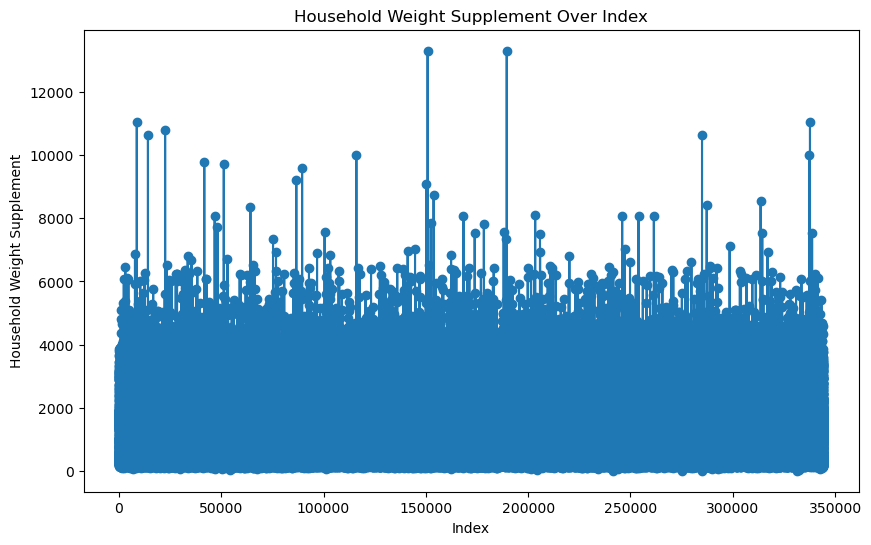

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['hwtsupp'], marker='o')
plt.title('Household Weight Supplement Over Index')
plt.xlabel('Index')
plt.ylabel('Household Weight Supplement')
plt.xticks(data['Index'])  # Set x-ticks to be the indices
plt.grid()
plt.show()


In [23]:
data['region'] = data['region'].fillna(data['region'].mode()[0])
print(data['region'])
missing_values = data['region'].isna()
print("Total missing values in 'region':", missing_values.sum())

# Print the rows with missing values
print("\nRows with missing values in 'region':")
print(data[missing_values])

0         0
1         2
2         0
3         3
4         2
         ..
344282    1
344283    3
344284    2
344285    1
344286    3
Name: region, Length: 344287, dtype: int64
Total missing values in 'region': 0

Rows with missing values in 'region':
Empty DataFrame
Columns: [year, hwtsupp, region, statefip, metro, metarea, pernum, relate, age, sex, race, marst, nativity, educ99, classwkr, wkswork1, hrswork, uhrswork, union, incwage, inclongj, srcearn, qinclong, hisp, annhrs, incwageman, hrwage, perconexp, hdwfcoh, industry, occupation, education]
Index: []

[0 rows x 32 columns]


In [36]:
imputed_data = data.copy()
imputed_data.to_csv('imputed_data.csv', index=False)

In [37]:
imputed_data.head()

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,qinclong,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,0.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,0.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,0.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,0.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,NaN,0,2080,17000.0,8.173077,43.977001,1,14,0,5


In [38]:
nan_count = imputed_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 9



Columns with NaN values and their counts
metro         9759
metarea     103939
nativity     87824
educ99       87412
hrswork      10555
union        42379
inclongj     42379
srcearn      42379
qinclong     42379
dtype: int64


In [39]:
imputed_data = imputed_data.drop(columns=['metarea'], inplace=True)

In [42]:
imputed_data = pd.DataFrame(data)

# Drop the 'metarea' column
imputed_data = imputed_data.drop(columns=['metarea'])

# Print the updated imputed_data
print(imputed_data)

        year      hwtsupp  region  statefip  metro  pernum  relate  age  sex  \
0       1990  1052.650024       0        36    2.0       1     101   58    1   
1       2009   971.200012       2         5    2.0       4    1260   28    1   
2       1990  1622.280029       0        36    3.0       1     101   37    1   
3       1990  2689.909912       3         6    3.0       1     101   34    1   
4       1981  1911.900024       2        51    3.0       1     101   38    1   
...      ...          ...     ...       ...    ...     ...     ...  ...  ...   
344282  1981   970.179993       1        39    3.0       2    1260   28    2   
344283  1999  1753.010010       3         6    3.0       4     301   27    2   
344284  1981  1971.020020       2        48    3.0       2     201   36    2   
344285  2007   715.510010       1        19    4.0       2     201   49    2   
344286  2013   820.739990       3        49    NaN       2     201   36    2   

        race  ...  qinclong  hisp  annh

In [44]:
imputed_data['metro'].fillna(imputed_data['metro'].mode()[0], inplace=True)  # Mode for metro
imputed_data['nativity'].fillna(imputed_data['nativity'].mode()[0], inplace=True)  # Mode for nativity
imputed_data['educ99'].fillna(imputed_data['educ99'].mode()[0], inplace=True)  # Mode for educ99
imputed_data['hrswork'].fillna(imputed_data['hrswork'].median(), inplace=True)  # Median for hrswork
imputed_data['union'].fillna(imputed_data['union'].mode()[0], inplace=True)  # Mode for union
imputed_data['inclongj'].fillna(imputed_data['inclongj'].median(), inplace=True)  # Median for inclongj
imputed_data['srcearn'].fillna(imputed_data['srcearn'].mode()[0], inplace=True)  # Mode for srcearn
imputed_data = imputed_data.drop(columns=['qinclong'])

# Print the updated imputed_data
print("Imputed DataFrame:")
print(imputed_data)

# Optionally, save imputed_data to a CSV file
# imputed_data.to_csv('imputed_data.csv', index=False)


Imputed DataFrame:
        year      hwtsupp  region  statefip  metro  pernum  relate  age  sex  \
0       1990  1052.650024       0        36    2.0       1     101   58    1   
1       2009   971.200012       2         5    2.0       4    1260   28    1   
2       1990  1622.280029       0        36    3.0       1     101   37    1   
3       1990  2689.909912       3         6    3.0       1     101   34    1   
4       1981  1911.900024       2        51    3.0       1     101   38    1   
...      ...          ...     ...       ...    ...     ...     ...  ...  ...   
344282  1981   970.179993       1        39    3.0       2    1260   28    2   
344283  1999  1753.010010       3         6    3.0       4     301   27    2   
344284  1981  1971.020020       2        48    3.0       2     201   36    2   
344285  2007   715.510010       1        19    4.0       2     201   49    2   
344286  2013   820.739990       3        49    3.0       2     201   36    2   

        race  ...  s

/var/folders/v4/k1t2mjw11rj182w8k0njg8_h0000gn/T/ipykernel_19698/101508926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imputed_data['metro'].fillna(imputed_data['metro'].mode()[0], inplace=True)  # Mode for metro
/var/folders/v4/k1t2mjw11rj182w8k0njg8_h0000gn/T/ipykernel_19698/101508926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

In [45]:
nan_count = imputed_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 0



Columns with NaN values and their counts
Series([], dtype: int64)
